# Score Predictor given the state of the match
Here we developed a score predictor to gain a deeper understanding of our dataset. This involved predicting scores using various models and identifying the most important features for each model.

By doing this, we were able to determine which features were most influential in each model. This knowledge is invaluable as it provides insights into the characteristics that these models deem significant when making predictions.

With this understanding, we can refine our actual models for player analysis. This will allow us to predict the most impactful players for different situations, thereby increasing the probability of winning. This approach underscores the importance of EDA in machine learning and sports analytics, as it helps us make informed decisions and build more effective predictive models

### Import Dataset

In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv('../Data/selected_data/processed_data.csv')
df.head(5)

,batter,bowler,non_striker,runs_by_bat,extra_runs,total_runs_delivery,current_team_total,runs_remain,batter_runs,balls_faced,...,match_id,winning_team,batting_team,bowling_team,won,final_team_total,batter_type,non_striker_type,bowler_type,replacements
0,AJ Finch,SL Malinga,M Klinger,0,0,0,0,-1.0,0,1,...,Australia_Sri Lanka_2017-02-17,Sri Lanka,Australia,Sri Lanka,0.0,168,Right hand Bat,Right hand Bat,Right arm Fast,No Replacement
1,AJ Finch,SL Malinga,M Klinger,0,0,0,0,-1.0,0,2,...,Australia_Sri Lanka_2017-02-17,Sri Lanka,Australia,Sri Lanka,0.0,168,Right hand Bat,Right hand Bat,Right arm Fast,No Replacement
2,AJ Finch,SL Malinga,M Klinger,1,0,1,1,-1.0,1,3,...,Australia_Sri Lanka_2017-02-17,Sri Lanka,Australia,Sri Lanka,0.0,168,Right hand Bat,Right hand Bat,Right arm Fast,No Replacement
3,M Klinger,SL Malinga,AJ Finch,2,0,2,3,-1.0,2,1,...,Australia_Sri Lanka_2017-02-17,Sri Lanka,Australia,Sri Lanka,0.0,168,Right hand Bat,Right hand Bat,Right arm Fast,No Replacement
4,M Klinger,SL Malinga,AJ Finch,0,0,0,3,-1.0,2,2,...,Australia_Sri Lanka_2017-02-17,Sri Lanka,Australia,Sri Lanka,0.0,168,Right hand Bat,Right hand Bat,Right arm Fast,No Replacement


In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['toss_decision','toss_winner','batting_team','bowling_team','venue','batter_type','bowler_type'])
]
,remainder='passthrough')

In [42]:
from sklearn.metrics import log_loss

# Drop batter,bowler,non_striker,runs_by_bat,extra_runs,runs_remain,extra_type,wicket_type,player_out,month,match_id,non_striker_type,replacements
x = df.drop(['batter','bowler','non_striker','runs_by_bat','extra_runs','runs_remain','extra_type','wicket_type','player_out','month','match_id','non_striker_type','replacements','winning_team','final_team_total','won'], axis=1)
X = pd.get_dummies(x, columns=['toss_decision','toss_winner','batting_team','bowling_team','venue','batter_type','bowler_type'])
y = df['final_team_total']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217242 entries, 0 to 217241
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   total_runs_delivery  217242 non-null  int64  
 1   current_team_total   217242 non-null  int64  
 2   batter_runs          217242 non-null  int64  
 3   balls_faced          217242 non-null  int64  
 4   wickets_fallen       217242 non-null  int64  
 5   delivery             217242 non-null  float64
 6   over                 217242 non-null  int64  
 7   toss_decision        217242 non-null  object 
 8   toss_winner          217242 non-null  object 
 9   innings              217242 non-null  int64  
 10  venue                217242 non-null  object 
 11  year                 217242 non-null  int64  
 12  batting_team         217242 non-null  object 
 13  bowling_team         217242 non-null  object 
 14  batter_type          217242 non-null  object 
 15  bowler_type      

C:\Users\ajani\AppData\Local\Temp\ipykernel_26684\2167116644.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df1.corr()
C:\Users\ajani\AppData\Local\Temp\ipykernel_26684\2167116644.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(), annot=True, fmt=".2f", cmap="coolwarm")


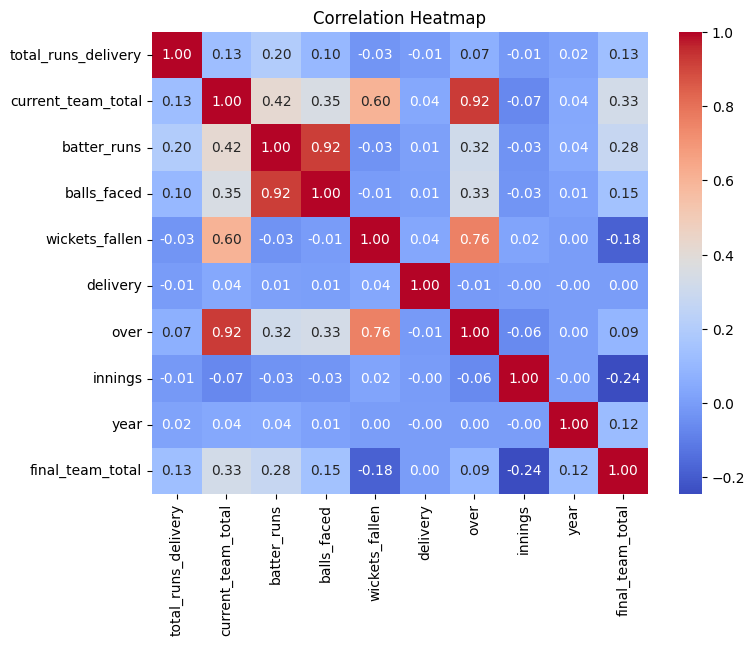

final_team_total       1.000000
current_team_total     0.325899
batter_runs            0.276292
balls_faced            0.148884
total_runs_delivery    0.131354
year                   0.115080
over                   0.091311
delivery               0.001520
wickets_fallen        -0.181637
innings               -0.244777
Name: final_team_total, dtype: float64

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
# add y with X and get the correlation
df1 = x.copy()
df1['final_team_total'] = y

# get the correlation of the data
corr = df1.corr()

# give annotation to the heatmap with 2 decimal points
plt.figure(figsize=(8,6))
sns.heatmap(df1.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

corr = corr['final_team_total']
corr = corr.sort_values(ascending=False)
corr

#### Observation:

Based on the correlation values

- `current_team_total` shows a moderate positive correlation of **0.325899** with `final_team_total`. This indicates that as the current team total increases, the final team total also tends to increase.
- `batter_runs` has a weak positive correlation of **0.276292** with `final_team_total`. This suggests that as the batter's runs increase, the final team total also tends to increase slightly.
- `balls_faced` has a weak positive correlation of **0.148884** with `final_team_total`. This suggests that as the number of balls faced increases, the final team total also tends to increase slightly.
- `total_runs_delivery` has a weak positive correlation of **0.131354** with `final_team_total`. This suggests that as the total runs in a delivery increase, the final team total also tends to increase slightly.
- `year` has a weak positive correlation of **0.115080** with `final_team_total`. This suggests that as the year increases, the final team total also tends to increase slightly.
- `over` has a weak positive correlation of **0.091311** with `final_team_total`. This suggests that as the over increases, the final team total also tends to increase slightly.
- `delivery` has a very weak positive correlation of **0.001520** with `final_team_total`. This suggests that the delivery has almost no linear relationship with the final team total.
- `wickets_fallen` has a weak negative correlation of **-0.181637** with `final_team_total`. This indicates that as the number of wickets fallen increases, the final team total tends to decrease slightly.
- `innings` has a weak negative correlation of **-0.244777** with `final_team_total`. This indicates that as the innings number increases, the final team total tends to decrease slightly.

these observations are based on the assumption that the data is linearly related. For a more accurate analysis, we might want to consider other statistical methods or machine learning models.

### Trying Random Forest Classifier

In [69]:
# Create the pipeline
from sklearn.ensemble import RandomForestClassifier


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_classifier.fit(X_train, y_train)

# Predict the labels
y_pred_test =  rf_classifier.predict(X_test)


# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred_test)
print(f'The accuracy of the model is: {accuracy:.2f}')

# predict the final score for test data
y_pred =  rf_classifier.predict(X_test)

# Create a DataFrame with the results
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})


results.head(10)

The accuracy of the model is: 0.98


,Actual,Predicted
0,178,178
1,170,170
2,132,132
3,171,171
4,173,173
5,163,163
6,214,214
7,80,80
8,157,157
9,102,102


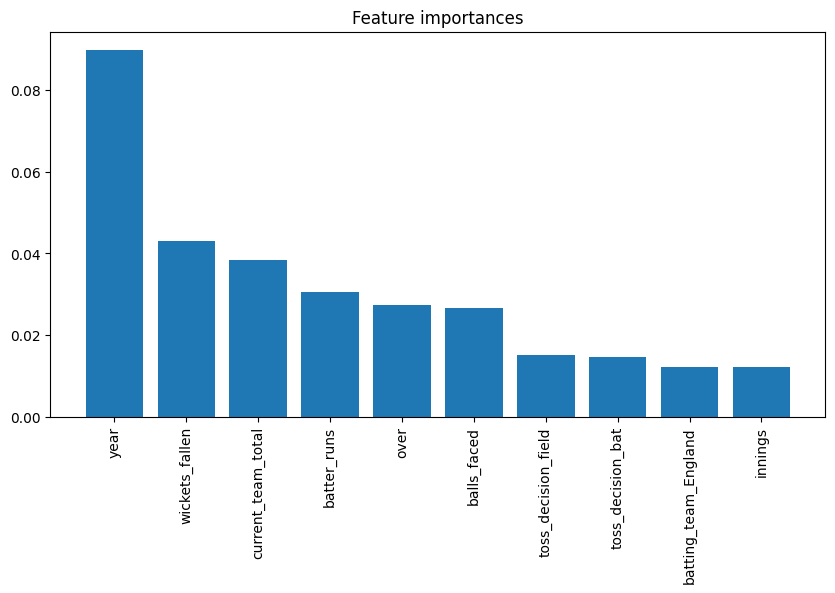

,Feature,Importance
0,year,0.089828
1,wickets_fallen,0.042970
2,current_team_total,0.038426
3,batter_runs,0.030471
4,over,0.027364
5,balls_faced,0.026739
6,toss_decision_field,0.015106
7,toss_decision_bat,0.014593
8,batting_team_England,0.012117
9,innings,0.012076


In [67]:
import matplotlib.pyplot as plt
import numpy as np

# plot a graph to show the feature importance
# only pick the top 10 features

importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10, 5))
plt.title("Feature importances")
plt.bar(range(10), importances[indices[:10]])
plt.xticks(range(10), [features[i] for i in indices[:10]], rotation=90)
plt.show()

# Create a DataFrame with the important features
important_features = pd.DataFrame({
    'Feature': features[indices],
    'Importance': importances[indices]
})

important_features.head(10)



Based on the feature importance values you've provided for your RandomForestClassifier, here are the observations:

- `year` is the most important feature with an importance score of **0.089828**. This suggests that the year of the match has the highest influence on the model's predictions.This could be due to various factors such as changes in team strategies, player performances, or cricketing rules over the years.
- `wickets_fallen` has the second highest importance score of **0.042970**, indicating that the number of wickets fallen also significantly influences the predictions.This aligns with the general understanding of cricket where losing wickets can often change the course of the match.
- `current_team_total` and `batter_runs` have importance scores of **0.038426** and **0.030471** respectively, suggesting that they also contribute to the model's decision-making process.This makes sense as the current team total and individual batter runs are direct contributors to the final team total.
- `over`, `balls_faced`, `toss_decision_field`, `toss_decision_bat`, `batting_team_England`, and `innings` have lower importance scores ranging from **0.027364** to **0.012076**. While these features contribute to the model's predictions, their influence is relatively less compared to the other features.

Please note that feature importance in a RandomForestClassifier gives you an indication of how important each feature is in the prediction process. However, it doesn't necessarily mean that a feature with a high importance score is more 'important' in a real-world sense. It simply means that this feature was found to be more useful when making predictions with this particular model. Different models might find different features to be more important. Also, correlation does not imply causation. For a more accurate analysis, you might want to consider other statistical methods or machine learning models.

C:\Users\ajani\AppData\Local\Temp\ipykernel_26684\4192907052.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred_test)


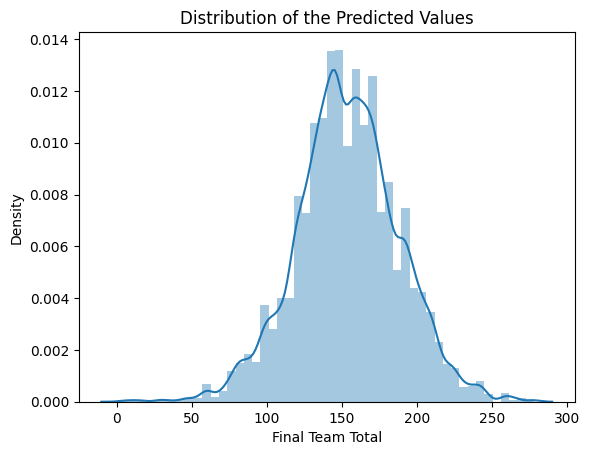

In [70]:
import seaborn as sns

# plot the distribution of the predicted values for the test set
sns.distplot(y_pred_test)
plt.title('Distribution of the Predicted Values')
plt.xlabel('Final Team Total')
plt.ylabel('Density')
plt.show()

The histogram overlaid with a kernel density estimate line graph

- The **histogram** (the bars) shows the frequency distribution of your predicted values. Each bar represents the number of test set instances (frequency) that fall within a particular range of values (bin). This gives you an idea of where most of your predictions are concentrated.

- The **kernel density estimate** (the line graph) gives a smooth curve that estimates the probability density function of our predicted values. It shows the probability of a random variable falling within a particular range of values.

The graph shows a normal distribution of data centered around a value slightly above 120 on the Final Team Total axis. This suggests that most predictions cluster around this central value, implying that for whatever metric or performance measure being predicted, there's a common outcome with variations following a bell-shaped curve typical of normal distribution.

In [71]:
from sklearn import metrics

# Make predictions on the training data
y_train_pred = rf_classifier.predict(X_train)
mae_train = metrics.mean_absolute_error(y_train, y_train_pred)
mse_train = metrics.mean_squared_error(y_train, y_train_pred)
rmse_train = metrics.mean_squared_error(y_train, y_train_pred, squared=False)
r2_train = metrics.r2_score(y_train, y_train_pred)

# Make predictions on the testing data
y_test_pred = rf_classifier.predict(X_test)

mae_test = metrics.mean_absolute_error(y_test, y_test_pred)
mse_test = metrics.mean_squared_error(y_test, y_test_pred)
rmse_test = metrics.mean_squared_error(y_test, y_test_pred, squared=False)
r2_test = metrics.r2_score(y_test, y_test_pred)

# Print the metrics
print("Training Metrics:")
print(f"MAE: {mae_train}")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")
print(f"R-squared (R²): {r2_train}")

print("\nTesting Metrics:")
print(f"MAE: {mae_test}")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"R-squared (R²): {r2_test}")

Training Metrics:
MAE: 0.0076757982197211624
MSE: 0.4566236844982249
RMSE: 0.6757393613651826
R-squared (R²): 0.9996141880737093

Testing Metrics:
MAE: 0.4878132983497894
MSE: 22.233031830421876
RMSE: 4.715191600605629
R-squared (R²): 0.9811267533254258


- **Training Metrics:**
  - The **Mean Absolute Error (MAE)** is **0.0077**, which is very low. This suggests that on average, your model's predictions are very close to the actual values in the training set.
  - The **Mean Squared Error (MSE)** is **0.4566**, and the **Root Mean Squared Error (RMSE)** is **0.6757**. These values are also quite low, indicating that the model's predictions are generally accurate, with only small deviations from the actual values.
  - The **R-squared (R²)** value is **0.9996**, which is very close to 1. This indicates that your model can explain approximately 99.96% of the variance in the target variable in the training set. This is an excellent score, suggesting that your model fits the training data very well.

- **Testing Metrics:**
  - The **Mean Absolute Error (MAE)** is **0.4878**. This suggests that on average, your model's predictions deviate from the actual values by about 0.4878 in the test set.
  - The **Mean Squared Error (MSE)** is **22.2330**, and the **Root Mean Squared Error (RMSE)** is **4.7152**. These values are higher than those for the training set, indicating that the model's predictions are less accurate on the test set.
  - The **R-squared (R²)** value is **0.9811**, which is still quite high. This indicates that your model can explain approximately 98.11% of the variance in the target variable in the test set.

These results suggest that your model performs very well on the training data and reasonably well on the test data. However, the difference in performance might suggest some **overfitting** to the training data.

In [72]:
# Cross validate the model with a threshold value of 10

from sklearn.model_selection import cross_val_score

# Calculate the cross-validated MAE
cross_val_mae = cross_val_score(rf_classifier, X, y, scoring='neg_mean_absolute_error', cv=5)
cross_val_mae = -cross_val_mae.mean()

# Calculate the cross-validated MSE
cross_val_mse = cross_val_score(rf_classifier, X, y, scoring='neg_mean_squared_error', cv=5)
cross_val_mse = -cross_val_mse.mean()

# Calculate the cross-validated RMSE
cross_val_rmse = cross_val_score(rf_classifier, X, y, scoring='neg_root_mean_squared_error', cv=5)
cross_val_rmse = -cross_val_rmse.mean()

# Calculate the cross-validated R²
cross_val_r2 = cross_val_score(rf_classifier, X, y, scoring='r2', cv=5)
cross_val_r2 = cross_val_r2.mean()

# Print the cross-validated metrics
print("Cross-Validated Metrics:")
print(f"MAE: {cross_val_mae}")
print(f"MSE: {cross_val_mse}")
print(f"RMSE: {cross_val_rmse}")
print(f"R-squared (R²): {cross_val_r2}")



c:\Users\ajani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\ajani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\ajani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\ajani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validated Metrics:
MAE: 24.609263344827642
MSE: 1388.2296212531478
RMSE: 37.13370321063787
R-squared (R²): -0.17408250503091294


## XGBRegressor

In [76]:
# Drop batter,bowler,non_striker,runs_by_bat,extra_runs,runs_remain,extra_type,wicket_type,player_out,month,match_id,non_striker_type,replacements
x = df.drop(['batter','bowler','non_striker','runs_by_bat','extra_runs','runs_remain','extra_type','wicket_type','player_out','month','match_id','non_striker_type','venue','replacements','winning_team','final_team_total','won'], axis=1)
X = pd.get_dummies(x, columns=['toss_decision','toss_winner','batting_team','bowling_team','batter_type','bowler_type'])
y = df['final_team_total']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score

xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)


# Fit the model
xgb_model.fit(X_train, y_train)

# Predict the labels
y_pred_test = xgb_model.predict(X_test)

# Calculate the accuracy
def custom_accuracy(y_test,y_pred,thresold):
    right = 0
    l = len(y_pred)
    for i in range(0,l):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            right += 1
    return ((right/l)*100)

# Convert y_test and y_pred_test to numpy arrays
y_test = np.array(y_test)
y_pred_test = np.array(y_pred_test)

print(f'The accuracy of the model is: {custom_accuracy(y_test, y_pred_test, 15):.2f}')

# Create a DataFrame with the results
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_test
})


results.head(10)

The accuracy of the model is: 75.22


,Actual,Predicted
0,178,172.680588
1,170,167.482590
2,132,146.361664
3,171,174.116653
4,173,176.586380
5,163,155.632050
6,214,176.103836
7,80,98.234077
8,157,148.989304
9,102,105.689735


In [79]:
# Make predictions on the training data
y_train_pred = xgb_model.predict(X_train)
mae_train = metrics.mean_absolute_error(y_train, y_train_pred)
mse_train = metrics.mean_squared_error(y_train, y_train_pred)
rmse_train = metrics.mean_squared_error(y_train, y_train_pred, squared=False)
r2_train = metrics.r2_score(y_train, y_train_pred)

# Make predictions on the testing data
y_test_pred = xgb_model.predict(X_test)

mae_test = metrics.mean_absolute_error(y_test, y_test_pred)
mse_test = metrics.mean_squared_error(y_test, y_test_pred)
rmse_test = metrics.mean_squared_error(y_test, y_test_pred, squared=False)
r2_test = metrics.r2_score(y_test, y_test_pred)

# Print the metrics
print("Training Metrics:")
print(f"MAE: {mae_train}")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")
print(f"R-squared (R²): {r2_train}")

print("\nTesting Metrics:")
print(f"MAE: {mae_test}")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"R-squared (R²): {r2_test}")

Training Metrics:
MAE: 10.497489810480367
MSE: 220.92983961344794
RMSE: 14.863708810840178
R-squared (R²): 0.8133312618463282

Testing Metrics:
MAE: 10.953232884461917
MSE: 239.41538128029066
RMSE: 15.47305339227816
R-squared (R²): 0.7967643107312355


C:\Users\ajani\AppData\Local\Temp\ipykernel_26684\246899966.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test_pred)


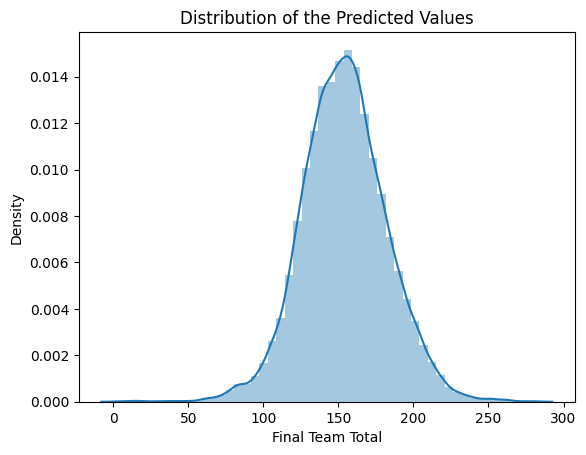

In [80]:
import seaborn as sns
sns.distplot(y_test_pred)
plt.title('Distribution of the Predicted Values')
plt.xlabel('Final Team Total')
plt.ylabel('Density')
plt.show()

The histogram overlaid with a kernel density estimate line graph

- The **histogram** (the bars) shows the frequency distribution of your predicted values. Each bar represents the number of test set instances (frequency) that fall within a particular range of values (bin). This gives you an idea of where most of your predictions are concentrated.

- The **kernel density estimate** (the line graph) gives a smooth curve that estimates the probability density function of our predicted values. It shows the probability of a random variable falling within a particular range of values.

The graph shows a normal distribution of data centered around a value slightly above 120 on the Final Team Total axis. This suggests that most predictions cluster around this central value, implying that for whatever metric or performance measure being predicted, there's a common outcome with variations following a bell-shaped curve typical of normal distribution.

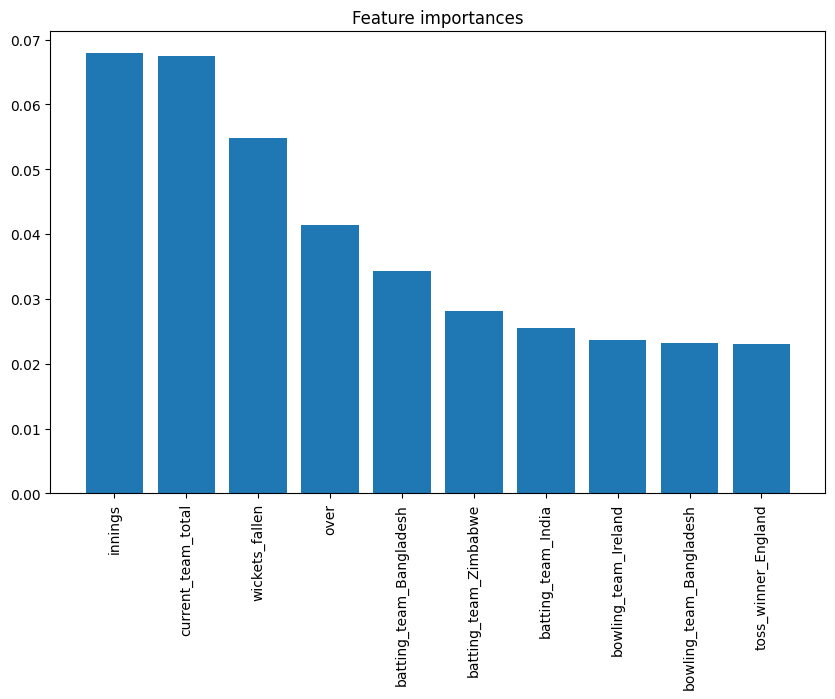

,Feature,Importance
0,innings,0.067866
1,current_team_total,0.067511
2,wickets_fallen,0.054837
3,over,0.041368
4,batting_team_Bangladesh,0.034360
5,batting_team_Zimbabwe,0.028092
6,batting_team_India,0.025496
7,bowling_team_Ireland,0.023735
8,bowling_team_Bangladesh,0.023238
9,toss_winner_England,0.023093


In [82]:
import matplotlib.pyplot as plt
import numpy as np

# plot a graph to show the feature importance
# only pick the top 10 features

importances = xgb_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(10), importances[indices[:10]])
plt.xticks(range(10), features[indices[:10]], rotation=90)
plt.show()

# Create a DataFrame with the important features
important_features = pd.DataFrame({
    'Feature': features[indices],
    'Importance': importances[indices]
})

important_features.head(10)

- `innings` and `current_team_total` are the most important features with importance scores of **0.067866** and **0.067511** respectively. This suggests that the innings of the match and the current team total have the highest influence on the model's predictions.

- `wickets_fallen` and `over` have importance scores of **0.054837** and **0.041368** respectively, suggesting that they also contribute significantly to the model's decision-making process.

- The remaining features (`batting_team_Bangladesh`, `batting_team_Zimbabwe`, `batting_team_India`, `bowling_team_Ireland`, `bowling_team_Bangladesh`, and `toss_winner_England`) have lower importance scores ranging from **0.034360** to **0.023093**. While these features contribute to the model's predictions, their influence is relatively less compared to the other features. but these features represent different teams involved in the matches. Their presence in the feature importance list suggests that the specific teams playing the match, whether they are batting or bowling, and even the team that won the toss, can significantly influence the final team total.

Please note that feature importance in an XGBRegressor gives we an indication of how important each feature is in the prediction process. However, it doesn't necessarily mean that a feature with a high importance score is more 'important' in a real-world sense. It simply means that this feature was found to be more useful when making predictions with this particular model. 
